## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [ ]:
dataset = pd.read_csv("C:/Users/skuma565/OneDrive - Capgemini/Desktop/Sprint 2/TSLA.csv")


In [ ]:
dataset.describe()

,Open,High,Low,Volume,Close
count,2843.000000,2841.000000,2841.000000,2.840000e+03,2843.000000
mean,352.085743,108.232115,103.624393,3.143291e+07,105.924597
std,13127.704277,192.525429,184.685470,2.842489e+07,188.836358
min,3.228000,3.326000,2.996000,5.925000e+05,3.160000
25%,10.984000,11.636000,10.740000,1.252462e+07,10.727000
50%,45.897999,46.577999,45.108002,2.481800e+07,45.916000
75%,65.064999,66.330002,64.036003,4.013938e+07,65.275002
max,700000.000000,900.400024,871.599976,3.046940e+08,883.090027


## Taking care of Outliers

In [ ]:
max_threshold = dataset['Open'].quantile(0.999)
max_threshold

871.4038429520024

In [ ]:
dataset = dataset[dataset['Open']<max_threshold]
dataset.describe()

,Open,High,Low,Volume,Close
count,2840.000000,2838.000000,2838.000000,2.837000e+03,2840.000000
mean,105.356115,107.719925,103.124817,3.145012e+07,105.423155
std,187.694808,191.503453,183.671388,2.843375e+07,187.836950
min,3.228000,3.326000,2.996000,5.925000e+05,3.160000
25%,10.734000,11.637000,10.743000,1.252550e+07,10.762500
50%,45.871001,46.563000,45.105002,2.482750e+07,45.909000
75%,65.000000,66.303000,63.975499,4.014650e+07,65.222002
max,870.349976,900.400024,858.659973,3.046940e+08,880.799988


In [ ]:
dataset.shape

(2840, 6)

## Checking for null values

In [ ]:
dataset.isnull().sum()

Date      0
Open      0
High      2
Low       2
Volume    3
Close     0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 0 to 2842
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2840 non-null   object 
 1   Open    2840 non-null   float64
 2   High    2838 non-null   float64
 3   Low     2838 non-null   float64
 4   Volume  2837 non-null   float64
 5   Close   2840 non-null   float64
dtypes: float64(5), object(1)
memory usage: 155.3+ KB


In [ ]:
dataset.head()

,Date,Open,High,Low,Volume,Close
0,01-07-2010,5.000,5.184,4.054,41094000.0,4.392
1,02-07-2010,4.600,4.620,3.742,25699000.0,3.840
2,06-07-2010,4.000,4.000,3.166,34334500.0,3.222
3,07-07-2010,3.280,3.326,2.996,NaN,3.160
4,08-07-2010,3.228,3.504,3.114,38557000.0,3.492


In [ ]:
dataset['Volume']=dataset['Volume'].fillna(value=dataset['Volume'].mean())

In [ ]:
dataset['High']=dataset['High'].fillna(value=dataset['High'].mean())

In [ ]:
dataset['Low']=dataset['Low'].fillna(value=dataset['Low'].mean())

In [ ]:
dataset.head()

,Date,Open,High,Low,Volume,Close
0,01-07-2010,5.000,5.184,4.054,4.109400e+07,4.392
1,02-07-2010,4.600,4.620,3.742,2.569900e+07,3.840
2,06-07-2010,4.000,4.000,3.166,3.433450e+07,3.222
3,07-07-2010,3.280,3.326,2.996,3.145012e+07,3.160
4,08-07-2010,3.228,3.504,3.114,3.855700e+07,3.492


In [ ]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [ ]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[5.00000000e+00, 5.18400000e+00, 4.05400000e+00, 4.10940000e+07],
       [4.60000000e+00, 4.62000000e+00, 3.74200000e+00, 2.56990000e+07],
       [4.00000000e+00, 4.00000000e+00, 3.16600000e+00, 3.43345000e+07],
       ...,
       [8.00929993e+02, 8.12320007e+02, 7.96570007e+02, 2.20200000e+07],
       [8.10469971e+02, 8.15409973e+02, 8.05780029e+02, 1.41201000e+07],
       [8.15489990e+02, 8.20250000e+02, 8.13349976e+02, 1.22032000e+07]])

In [ ]:
y

array([  4.392   ,   3.84    ,   3.222   , ..., 805.719971, 811.080017,
       818.320007])

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Visualizing the dataset

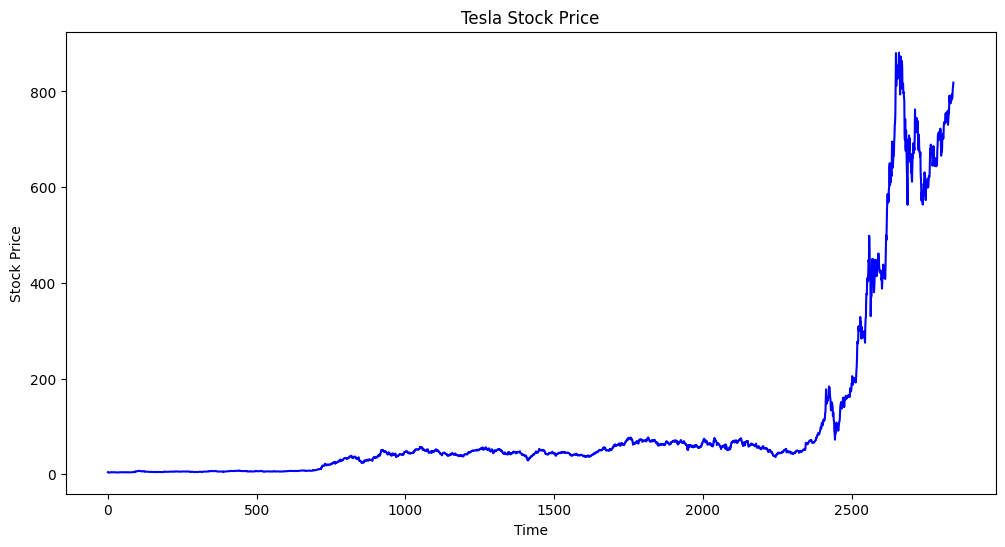

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dataset["Close"],color="blue")

plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

In [ ]:
dataset.corr(numeric_only = True)

,Open,High,Low,Volume,Close
Open,1.000000,0.999341,0.999589,0.146413,0.999441
High,0.999341,1.000000,0.999082,0.150647,0.999347
Low,0.999589,0.999082,1.000000,0.140725,0.999584
Volume,0.146413,0.150647,0.140725,1.000000,0.147286
Close,0.999441,0.999347,0.999584,0.147286,1.000000


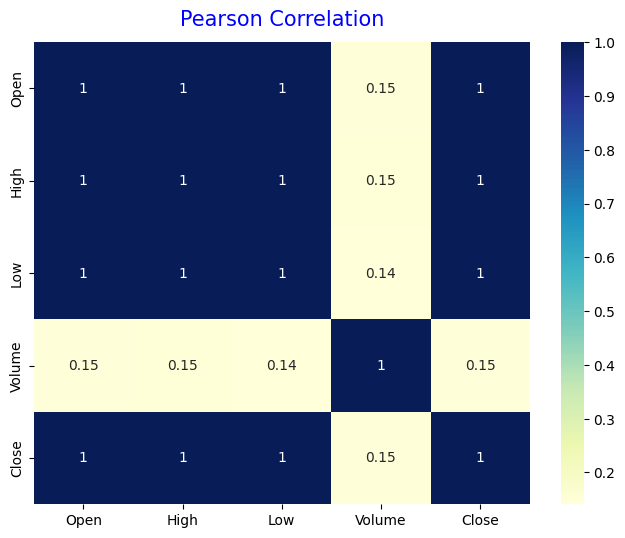

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(dataset.corr(numeric_only = True), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

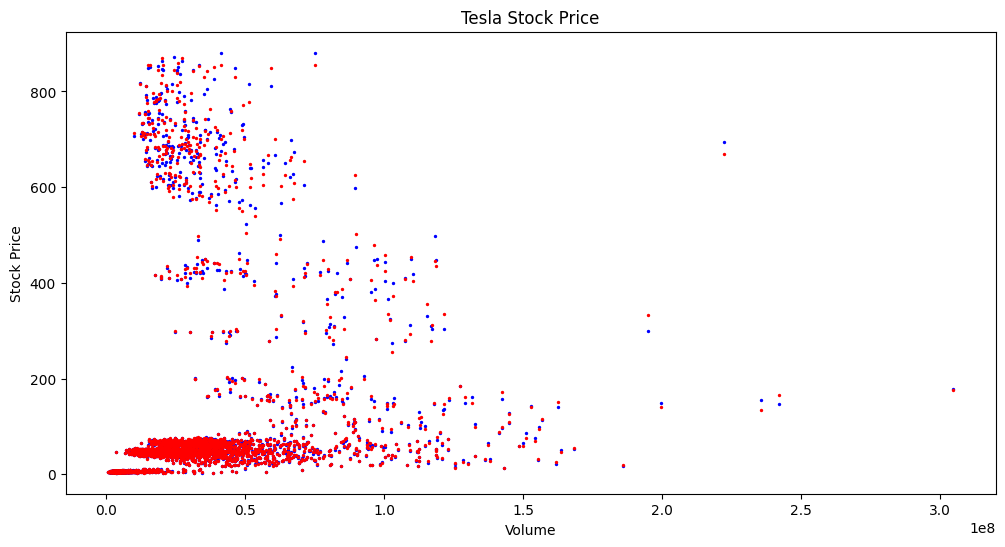

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(dataset["Volume"],dataset["Close"],color="blue",s=2)
plt.scatter(dataset["Volume"],dataset["Open"],color="red",s=2)
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Volume")
plt.show()

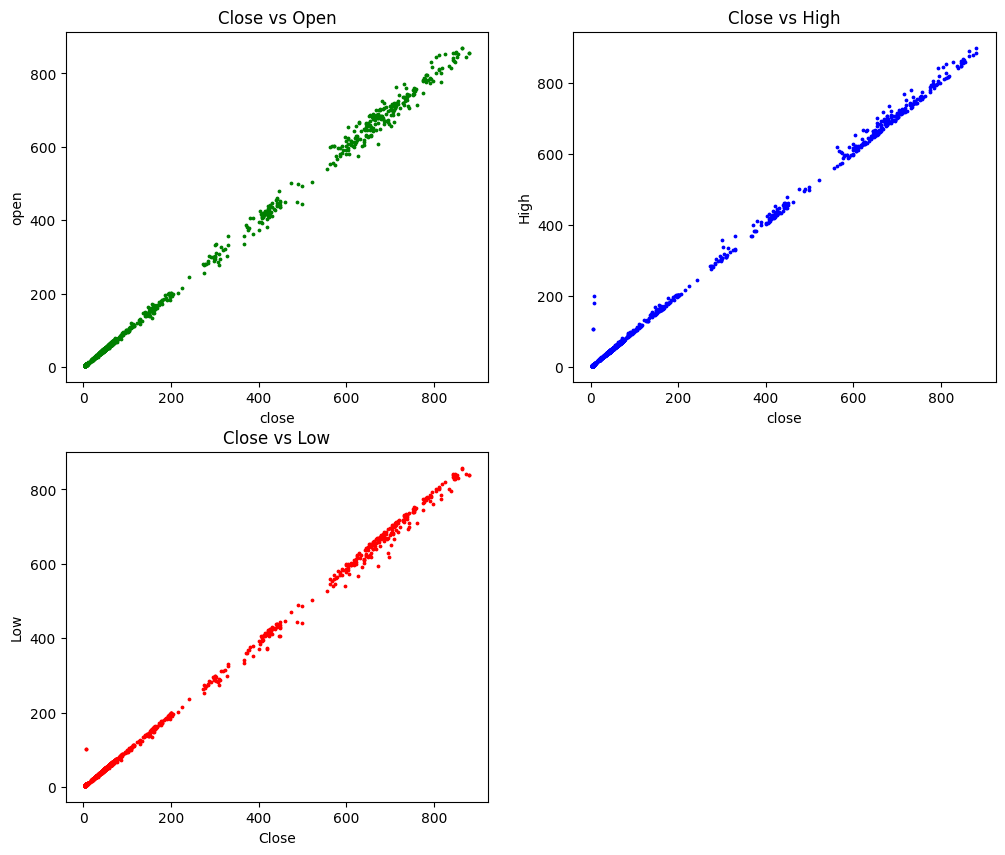

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Close vs Open")
plt.xlabel('close')
plt.ylabel('open')
plt.scatter(dataset['Close'],dataset['Open'], color = 'g',s=3)


plt.subplot(2,2,2)
plt.title("Close vs High")
plt.xlabel('close')
plt.ylabel('High')
plt.scatter(dataset['Close'],dataset['High'],color ='b',s=3)

plt.subplot(2,2,3)
plt.title("Close vs Low")
plt.xlabel('Close')
plt.ylabel('Low')
plt.scatter(dataset['Close'],dataset['Low'], color ='r',s=3)
plt.show()
%matplotlib inline

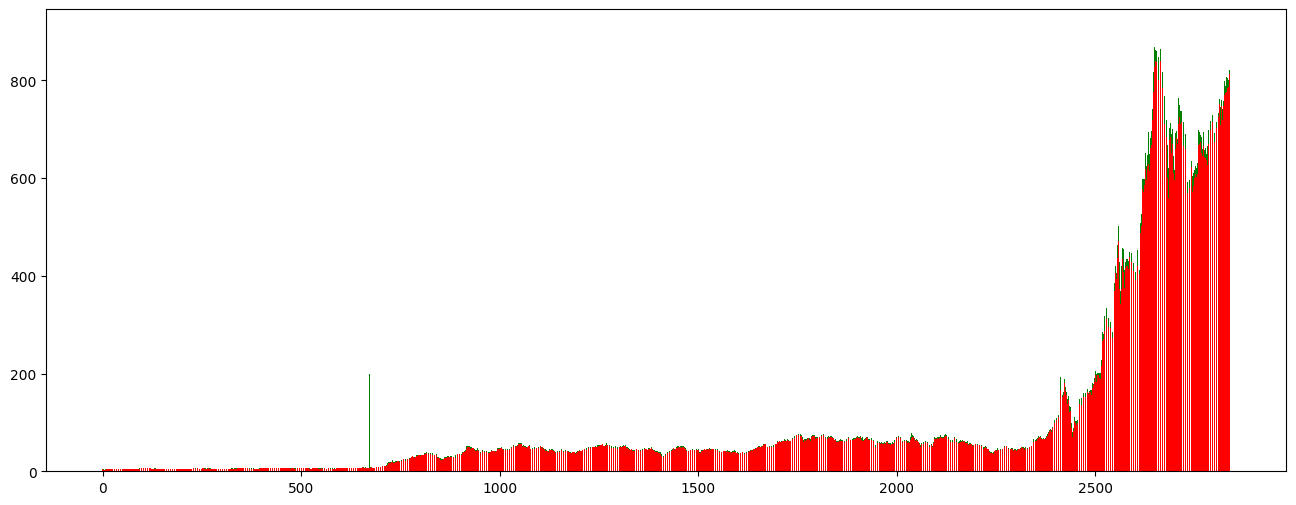

In [ ]:
plt.figure(figsize=(16,6))
plt.bar(range(len(dataset)),dataset["High"],color = 'g',linewidth=0.1)
plt.bar(range(len(dataset)),dataset["Low"],color = 'r',linewidth=0.1)
plt.show()

## Training the Simple Multilinear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
comparison = pd.DataFrame({'predicted':y_pred,'actual':y_test})

In [ ]:
print(comparison.head(15))

     predicted      actual
0    48.637149   48.535999
1    61.558395   61.779999
2     4.368181    4.732000
3    67.632060   67.089996
4    52.682763   52.976002
5     4.496152    4.800000
6    59.975276   60.507999
7   635.550579  673.580017
8   430.889673  429.950012
9   680.324971  670.969971
10    6.138626    6.582000
11    5.533972    5.896000
12    5.696567    6.132000
13    3.371631    3.758000
14  687.831587  678.900024


## Computing R2_Score

In [ ]:
from sklearn.metrics import r2_score
ML=r2_score(y_test, y_pred)
ML

0.9991502741048961

## K fold cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.93 %
Standard Deviation: 0.06 %


## Comparison between test set and predicted values

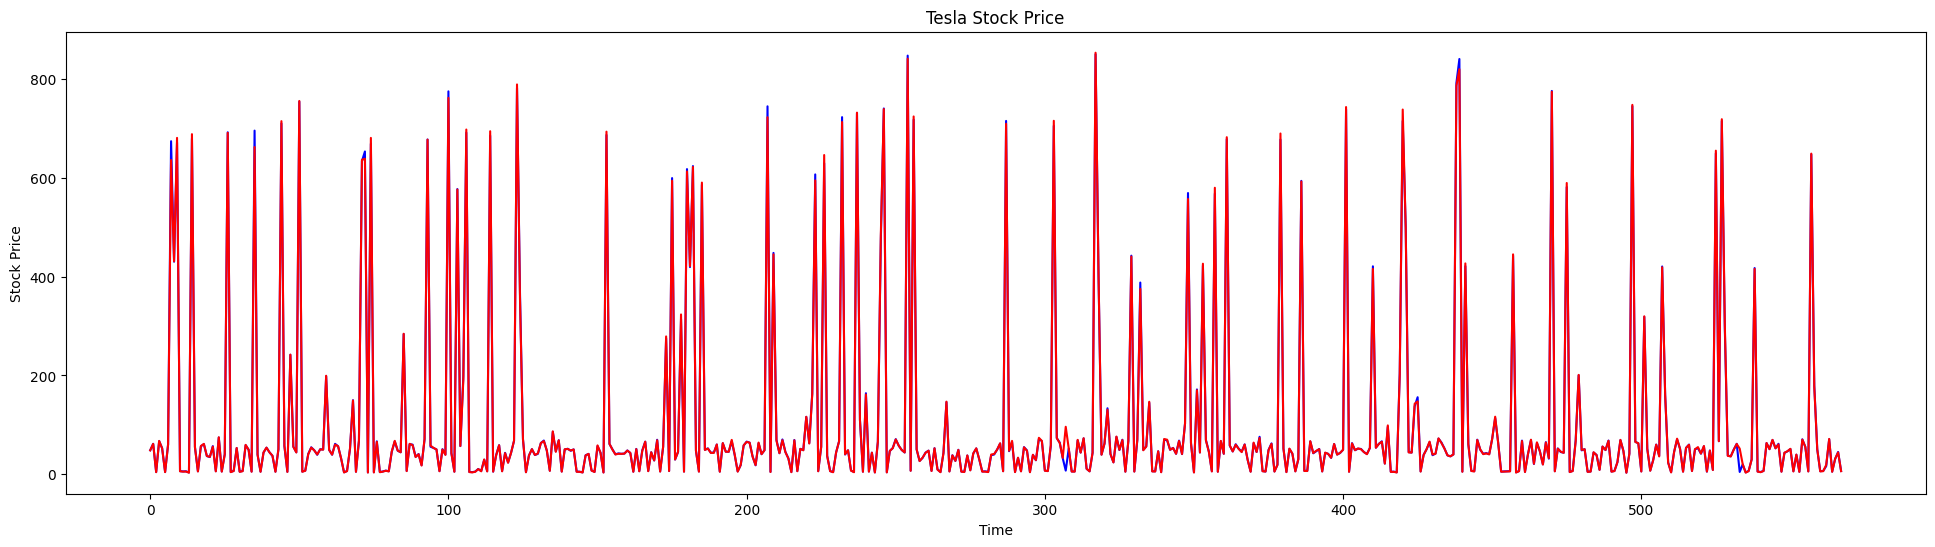

In [ ]:
plt.figure(figsize=(24,6))
plt.plot(y_test,color="blue")
plt.plot(y_pred,color="red")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

## Extra Models

# Decision Tree

## Training the Decision Tree model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
comparison = pd.DataFrame({'predicted':y_pred,'actual':y_test})

In [ ]:
print(comparison.head(15))

     predicted      actual
0    48.518002   48.535999
1    61.916000   61.779999
2     4.644000    4.732000
3    66.879997   67.089996
4    51.731998   52.976002
5     4.868000    4.800000
6    59.984001   60.507999
7   677.349976  673.580017
8   434.000000  429.950012
9   670.940002  670.969971
10    6.532000    6.582000
11    5.714000    5.896000
12    5.822000    6.132000
13    3.754000    3.758000
14  682.219971  678.900024


## Computing R2_Score

In [ ]:
from sklearn.metrics import r2_score
DT = r2_score(y_test, y_pred)
DT

0.9991432103838196

## K-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.91 %
Standard Deviation: 0.03 %


## Best Model

In [ ]:
if ML>DT:
    print("Multilinear model is better than Decision Tree with accuracy of {} based on r2_score".format(ML))
else:
    print("Decision Tree model is better than Multilinear model with accuracy of {} based on r2_score".format(DT))

Multilinear model is better than Decision Tree with accuracy of 0.9991502741048961 based on r2_score
